In [115]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [116]:
# Reading data frames

ex_emp = pd.read_excel('employees_left.xlsx')
cur_emp = pd.read_excel('existing_employees.xlsx')
ex_emp.tail()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
3566,14995,0.40,0.57,2,151,3,0,0,support,low
3567,14996,0.37,0.48,2,160,3,0,0,support,low
3568,14997,0.37,0.53,2,143,3,0,0,support,low
3569,14998,0.11,0.96,6,280,4,0,0,support,low
3570,14999,0.37,0.52,2,158,3,0,0,support,low


In [117]:
# Adding new column 'Status' to dateframe to distinguish current and ex employees


ex_emp['status'] = 0
cur_emp['status'] = 1

In [118]:
cur_emp.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
0,2001,0.58,0.74,4,215,3,0,0,sales,low,1
1,2002,0.82,0.67,2,202,3,0,0,sales,low,1
2,2003,0.45,0.69,5,193,3,0,0,sales,low,1
3,2004,0.78,0.82,5,247,3,0,0,sales,low,1
4,2005,0.49,0.60,3,214,2,0,0,sales,low,1


In [119]:
ex_emp.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
0,1,0.38,0.53,2,157,3,0,0,sales,low,0
1,2,0.80,0.86,5,262,6,0,0,sales,medium,0
2,3,0.11,0.88,7,272,4,0,0,sales,medium,0
3,4,0.72,0.87,5,223,5,0,0,sales,low,0
4,5,0.37,0.52,2,159,3,0,0,sales,low,0


In [120]:
# Combining dataframes

full_emp = pd.concat([ex_emp, cur_emp])

In [121]:
# checking for null values

full_emp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 11427
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  status                 14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.4+ MB


In [122]:
full_emp.isnull().sum()

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
status                   0
dtype: int64

In [123]:
# Dealing with category data

full_emp['sal_class'] = 0
full_emp['dept_class'] = 0

In [124]:
# salary class conversion


full_emp.loc[full_emp['salary']=='low','sal_class'] = 0
full_emp.loc[full_emp['salary']=='medium','sal_class'] = 1
full_emp.loc[full_emp['salary']=='high','sal_class'] = 2

In [125]:
# dept class conversion - using dict_mapping

# step 1 - make list of dept with unique values
# step2 - make list of keys using length of dept_list
# step 3 - creating dict by combining above two lists
# step 4 - converting category using map function

#step 1

dept_list = full_emp.dept.unique()

#step 2

dept_key_list = range(len(dept_list))

#step 3

dept_dict = dict(zip(dept_list,dept_key_list))

#step 4

full_emp['dept_class'] = full_emp['dept'].map(dept_dict)



In [126]:
full_emp.tail(1)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status,sal_class,dept_class
11427,14211,0.5,0.73,4,180,3,0,0,IT,low,1,0,6


In [127]:
# Categorising features for plotting graphs

# Num_features for numerical features 
# Cat_features for categorical features

num_features = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']
cat_features = ['dept','salary']

In [129]:
# Creating Histogram function to plot feature Vs status


def hg (function):
    plt.hist(full_emp[function][full_emp.status==1], bins=10, label='in_job')
    plt.hist(full_emp[function][full_emp.status==0], bins=10, label='left_job')
    plt.legend(loc='best')
    plt.xlabel(f'{function}')
    plt.ylabel('No of employees')
    plt.title(f'{function} vs number_of_employees')
    plt.show()

In [130]:
# creating stacked barchart function for categorical data


def  barchart(column):
    employee = full_emp[full_emp['status']==1][column].value_counts()
    ex_employee = full_emp[full_emp['status']==0][column].value_counts()
    df = pd.DataFrame([employee,ex_employee])
    df.index = ['in_job','left_job']
    df.plot(kind = 'bar', stacked = True, figsize = (8,4))

In [175]:
# Creating Histogram function to plot feature1 Vs status of a particular feature2 condition


def hist_2f (f1,f2,val):
    plt.hist(full_emp[f1][(full_emp.status==1) & (full_emp[f2]==val)], bins=10, label='in_job')
    plt.hist(full_emp[f1][(full_emp.status==0) & (full_emp[f2]==val)], bins=10, label='left_job')
    plt.legend(loc='best')
    plt.xlabel(f'{f1}')
    plt.ylabel('No of employees')
    plt.title(f'{f1} vs number_of_employees of {val} ')
    plt.show()

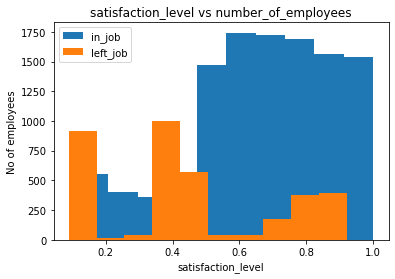

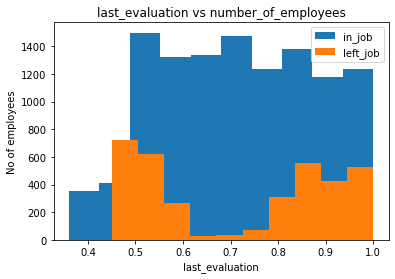

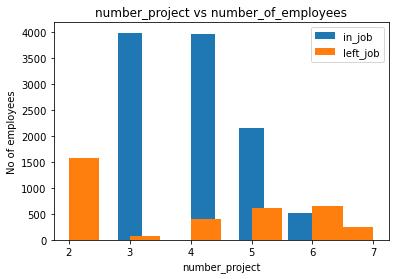

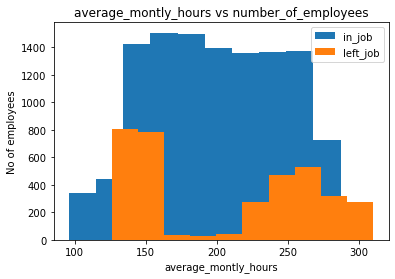

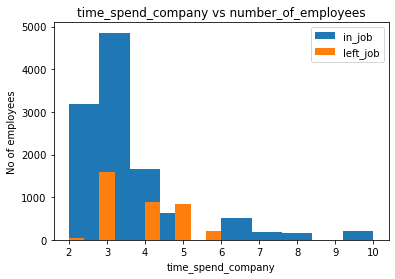

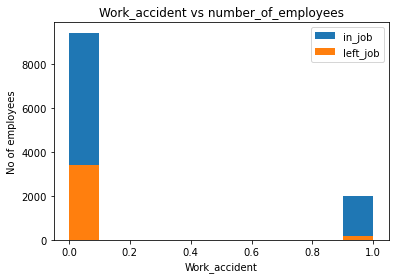

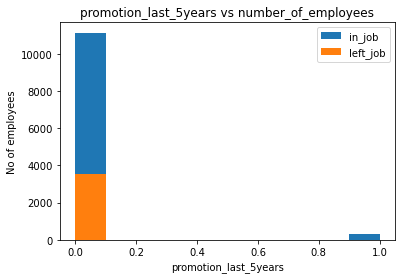

In [131]:
# plotting histogram for numerical features

for f in num_features:
    hg(f)

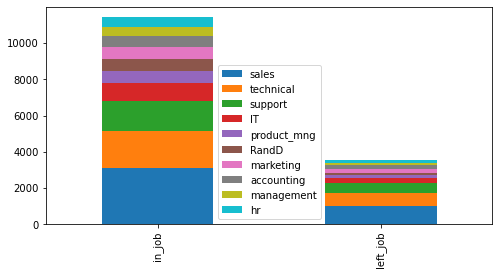

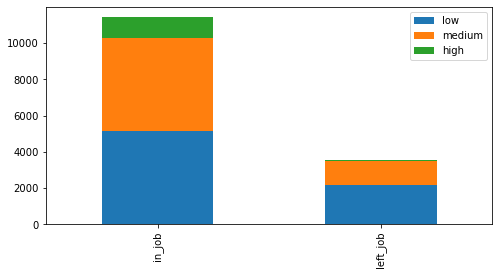

In [132]:
# plotting barchart for categorical features

for f in cat_features:
    barchart(f)

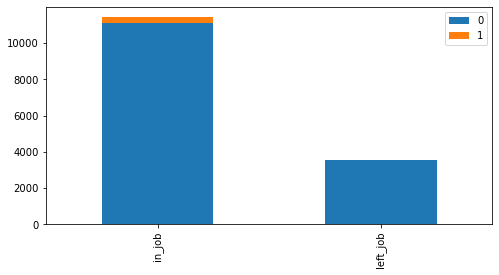

In [133]:
barchart('promotion_last_5years')

In [134]:
#--------------------------FEATURE SCALING----------------------------------------------#

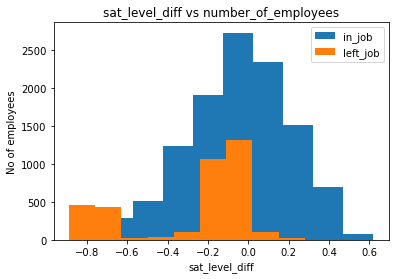

In [135]:
# Feature Scaling

# SATISFACTION LEVEL
# Creating new feature sat_level_diff as a difference of satisfaction_level and last_evaluation


full_emp['sat_level_diff'] =  full_emp['satisfaction_level'] - full_emp['last_evaluation']
hg('sat_level_diff')

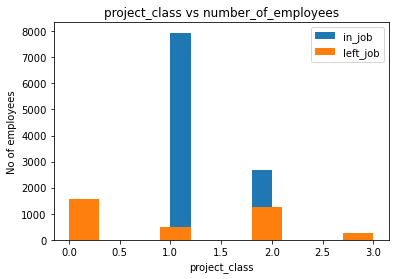

In [136]:
# NUMBER OF PROJECTS

# FROM THE GRAPH
# Employees with number of projects between 150 and 250 are more likely to continue in the job as compared to people with projects less than 3 and greater than 6

# classify number_project to 4 classes as follows
# class 0 > 0-2 projects
# class 1 > 3-4 projects
# class 2 > 5-6 projects
# class 3 > 7-8 projects

full_emp['project_class'] = 0

full_emp.loc[full_emp['number_project']<=2 ,'project_class'] = 0
full_emp.loc[(full_emp['number_project']>2) & (full_emp['number_project']<=4),'project_class'] = 1
full_emp.loc[(full_emp['number_project']>4) & (full_emp['number_project']<=6),'project_class'] = 2
full_emp.loc[(full_emp['number_project']>6) & (full_emp['number_project']<=8),'project_class'] = 3
    
hg('project_class')

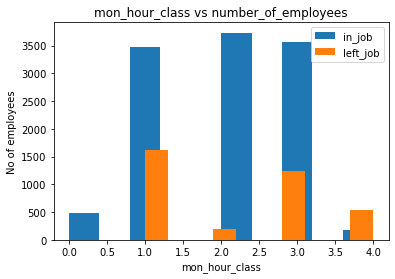

In [137]:
# AVE MONTHLY HOURS

# FROM THE GRAPH
# Employees with average_montly_hours between 3 and 6 are more likely to continue in the job as compared to people with projects less than 3 and greater than 6

# classify number_project to 4 classes as follows
# class 0 > 0-2 projects
# class 1 > 3-4 projects
# class 2 > 5-6 projects
# class 3 > 7-8 projects

full_emp['mon_hour_class'] = 0

full_emp.loc[full_emp['average_montly_hours']<=125 ,'mon_hour_class'] = 0
full_emp.loc[(full_emp['average_montly_hours']>125) & (full_emp['average_montly_hours']<=175),'mon_hour_class'] = 1
full_emp.loc[(full_emp['average_montly_hours']>175) & (full_emp['average_montly_hours']<=225),'mon_hour_class'] = 2
full_emp.loc[(full_emp['average_montly_hours']>225) & (full_emp['average_montly_hours']<=275),'mon_hour_class'] = 3
full_emp.loc[(full_emp['average_montly_hours']>275) & (full_emp['average_montly_hours']<=325),'mon_hour_class'] = 4
full_emp.loc[(full_emp['average_montly_hours']>325) & (full_emp['average_montly_hours']<=375),'mon_hour_class'] = 5


hg('mon_hour_class')

In [185]:
#=================================================================================================#

In [199]:
# Defining features and results

In [187]:
full_emp.head(1)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status,sal_class,dept_class,sat_level_diff,project_class,mon_hour_class
0,1,0.38,0.53,2,157,3,0,0,sales,low,0,0,0,-0.15,0,1


In [190]:
# Defining Features(input) and Results(output)

req_features = ['sat_level_diff',
                'time_spend_company',
                'Work_accident',
                'promotion_last_5years',
                'sal_class',
                'dept_class',
                'project_class',
                'mon_hour_class']

In [193]:
emp_feat = full_emp[req_features]

In [194]:
emp_feat.head()

,sat_level_diff,time_spend_company,Work_accident,promotion_last_5years,sal_class,dept_class,project_class,mon_hour_class
0,-0.15,3,0,0,0,0,0,1
1,-0.06,6,0,0,1,0,2,3
2,-0.77,4,0,0,1,0,3,3
3,-0.15,5,0,0,0,0,2,2
4,-0.15,3,0,0,0,0,0,1


In [195]:
# Creating result dataframe with results

emp_results = full_emp.status

In [200]:
emp_results.head()

0    0
1    0
2    0
3    0
4    0
Name: status, dtype: int64

In [196]:
#===============================================================================================#

In [197]:
# Splitting data to Train and Test

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(emp_feat, emp_results, test_size = 0.2, random_state = 1)

In [201]:
#===============================================================================================#

In [206]:
# Model Building
# Random forest classifier
# Importing model and training y_train

In [202]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [207]:
# predicting y_pred

In [203]:
y_pred = classifier.predict(X_test)

In [204]:
y_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [208]:
# CONFUSION MATRIX

In [209]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 689,   35],
       [  53, 2223]], dtype=int64)

In [210]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.9844995571302038

In [211]:
recall_score(y_test, y_pred)

0.976713532513181

In [212]:
#=====================================================================================#

In [228]:
# Predicting employees to go from the entire list

In [216]:
cur_emp_list = full_emp[full_emp['status']==1]
cur_emp_feat = cur_emp_list[req_features]

In [217]:
cur_emp_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11428 entries, 0 to 11427
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sat_level_diff         11428 non-null  float64
 1   time_spend_company     11428 non-null  int64  
 2   Work_accident          11428 non-null  int64  
 3   promotion_last_5years  11428 non-null  int64  
 4   sal_class              11428 non-null  int64  
 5   dept_class             11428 non-null  int64  
 6   project_class          11428 non-null  int64  
 7   mon_hour_class         11428 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 803.5 KB


In [218]:
emp_togo = classifier.predict(cur_emp_feat)

In [226]:
np.sum(emp_togo==0)

107

In [227]:
sum(emp_togo)

11321